In [16]:
import numpy as np

In [17]:
X = np.array([1,2,3])
print(X)

[1 2 3]


In [18]:
B = np.array([10])
print(B)

[10]


In [19]:
print(X+B)

[11 12 13]


In [20]:
print(np.array([1,2,3])+np.array([10,10,10]))

[11 12 13]


In [21]:
# 출력층 
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #항등함수
        
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T,delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b
        
    

In [22]:
#  은닉층 
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드 함수
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*(self.y)
        self.grad_w = np.dot(self.x.T,delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b

In [23]:
import matplotlib.pyplot as plt

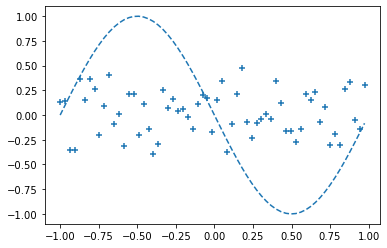

Epoch:0/2001 Error:0.2678352827961124


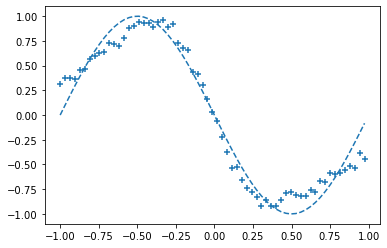

Epoch:200/2001 Error:0.009199337711841143


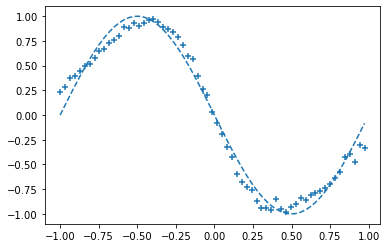

Epoch:400/2001 Error:0.004979251818579266


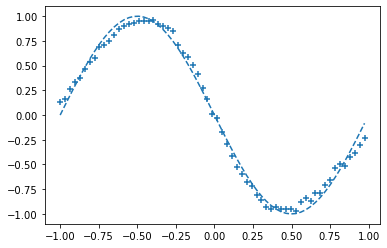

Epoch:600/2001 Error:0.0020989217224187126


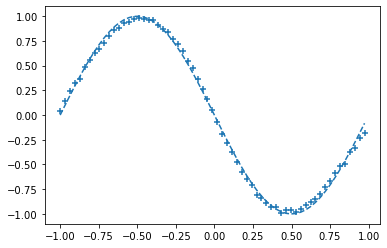

Epoch:800/2001 Error:0.0006494428215659683


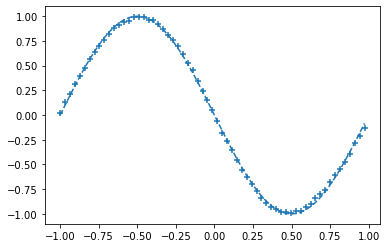

Epoch:1000/2001 Error:0.00018605592579461387


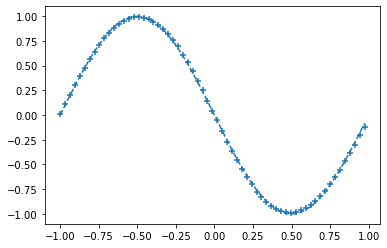

Epoch:1200/2001 Error:7.77779277127201e-05


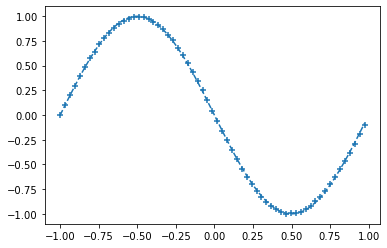

Epoch:1400/2001 Error:2.940037089153489e-05


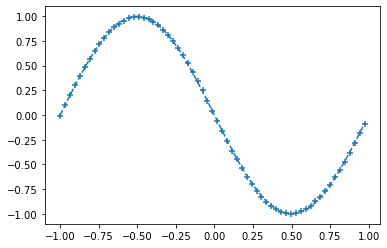

Epoch:1600/2001 Error:1.6133358562281828e-05


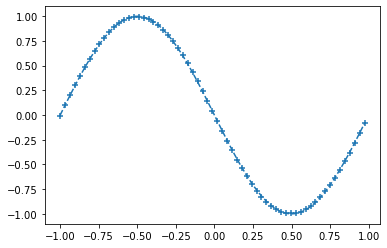

Epoch:1800/2001 Error:1.1548370367040199e-05


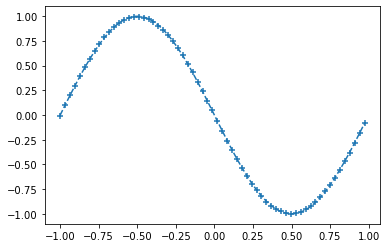

Epoch:2000/2001 Error:9.25136590746638e-06


In [24]:
input_data = np.arange(0,np.pi*2,0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # 입력을 -1.0~1.0
n_data = len (correct_data)

# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 3 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in,n_mid)
output_layer = OutputLayer(n_mid,n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval==0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval==0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) +'/'+ str(epoch),\
                'Error:' + str(total_error/n_data))






- 은닉층의 뉴런 수를 1,2,3,4,5 차례로 증가시키면서 결과를 확인

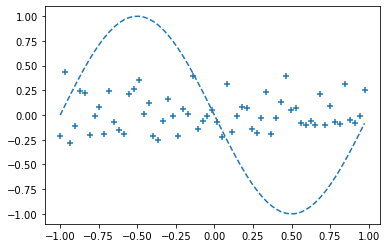

Epoch:0/2001 Error:0.26496917967895883


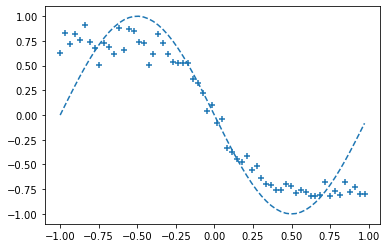

Epoch:200/2001 Error:0.03788261663359859


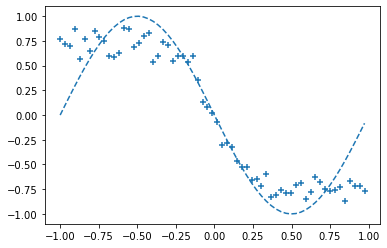

Epoch:400/2001 Error:0.03530279924752504


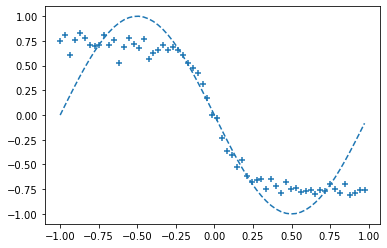

Epoch:600/2001 Error:0.03697839776805287


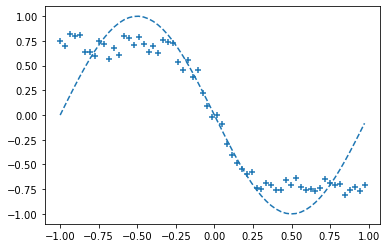

Epoch:800/2001 Error:0.03602270510078542


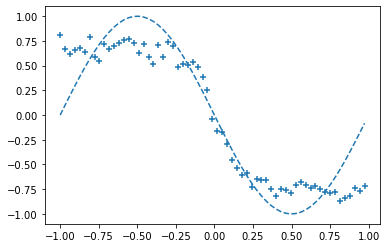

Epoch:1000/2001 Error:0.03633846642843971


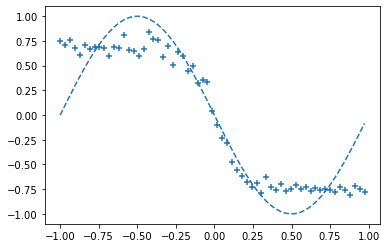

Epoch:1200/2001 Error:0.0353166193326527


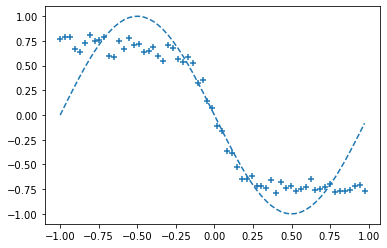

Epoch:1400/2001 Error:0.03711577320875552


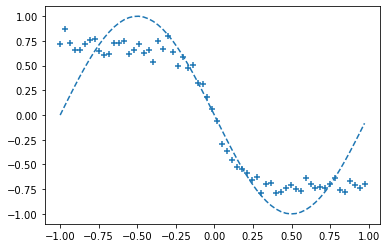

Epoch:1600/2001 Error:0.03586340395281012


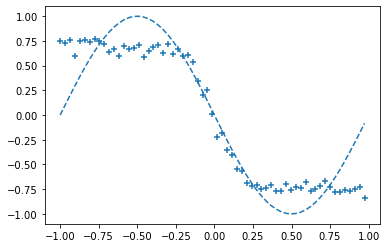

Epoch:1800/2001 Error:0.03727598552880791


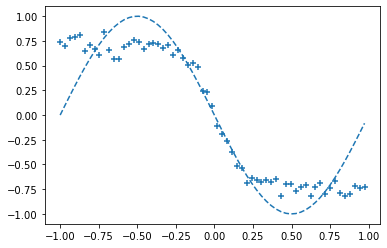

Epoch:2000/2001 Error:0.036300148669428774


In [25]:
# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 1 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in,n_mid)
output_layer = OutputLayer(n_mid,n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval==0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval==0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) +'/'+ str(epoch),\
                'Error:' + str(total_error/n_data))

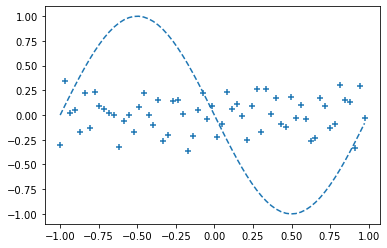

Epoch:0/2001 Error:0.27469031423099816


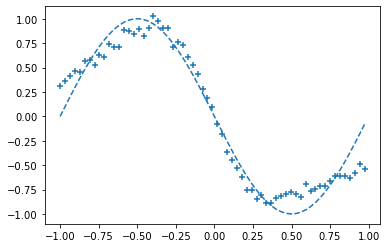

Epoch:200/2001 Error:0.011466329337048987


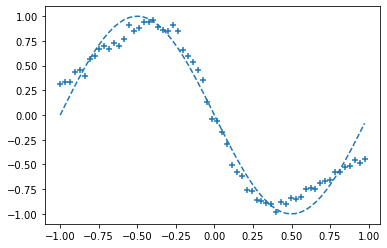

Epoch:400/2001 Error:0.008910375913657538


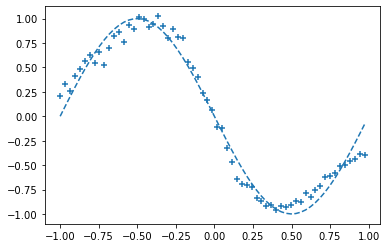

Epoch:600/2001 Error:0.006710300393755807


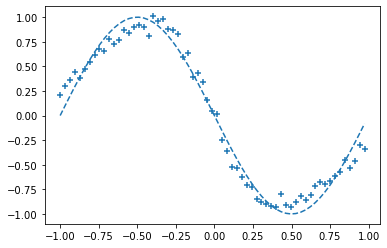

Epoch:800/2001 Error:0.006290687052636248


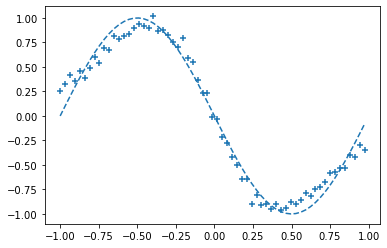

Epoch:1000/2001 Error:0.00613239078442075


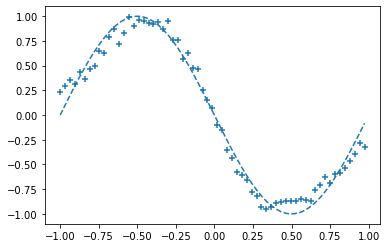

Epoch:1200/2001 Error:0.005132264311564193


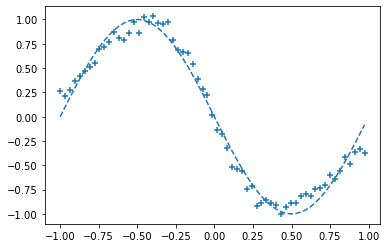

Epoch:1400/2001 Error:0.0052632984753340556


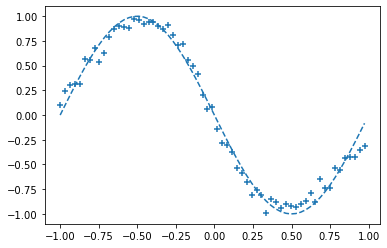

Epoch:1600/2001 Error:0.0038183342798671733


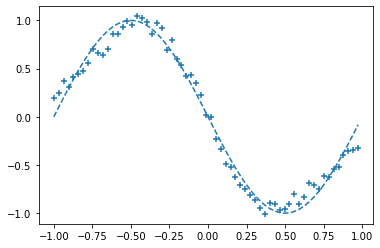

Epoch:1800/2001 Error:0.004800692590127366


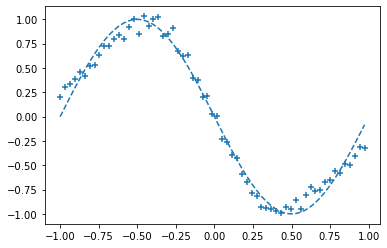

Epoch:2000/2001 Error:0.004708335753954331


In [26]:
# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 2 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in,n_mid)
output_layer = OutputLayer(n_mid,n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval==0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval==0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) +'/'+ str(epoch),\
                'Error:' + str(total_error/n_data))

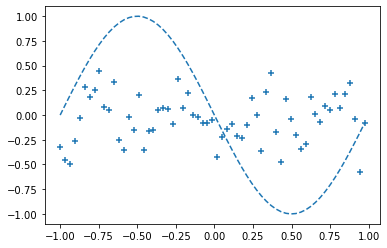

Epoch:0/2001 Error:0.26298391137101135


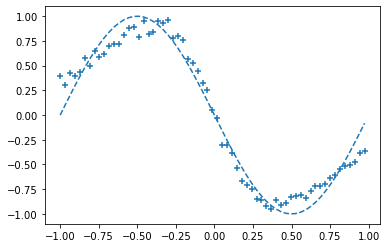

Epoch:200/2001 Error:0.008983213629114726


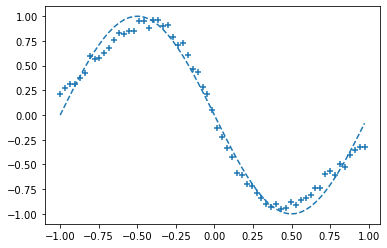

Epoch:400/2001 Error:0.005041178319293434


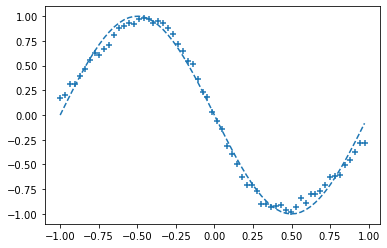

Epoch:600/2001 Error:0.002690510405947111


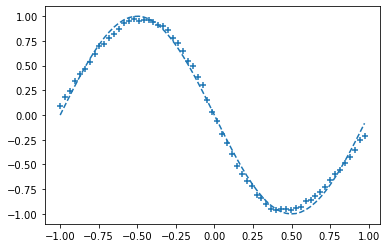

Epoch:800/2001 Error:0.001259383762389213


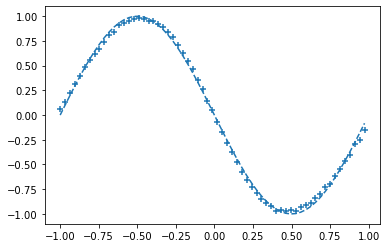

Epoch:1000/2001 Error:0.0005086411289985991


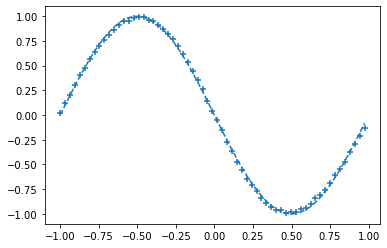

Epoch:1200/2001 Error:0.000199439131926654


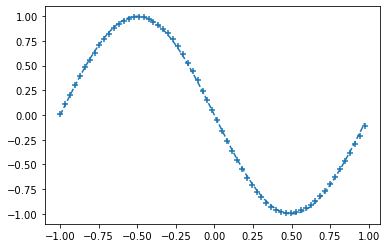

Epoch:1400/2001 Error:9.033090307050473e-05


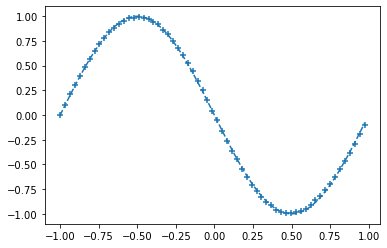

Epoch:1600/2001 Error:4.611804152913136e-05


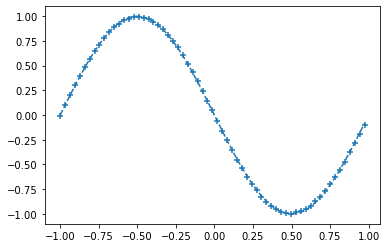

Epoch:1800/2001 Error:2.3894097584473165e-05


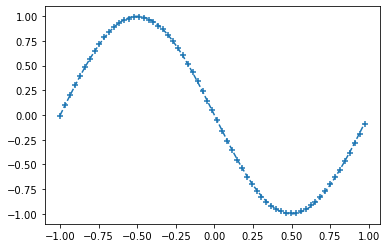

Epoch:2000/2001 Error:1.9224620089539934e-05


In [27]:
# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 4 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in,n_mid)
output_layer = OutputLayer(n_mid,n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval==0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval==0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) +'/'+ str(epoch),\
                'Error:' + str(total_error/n_data))

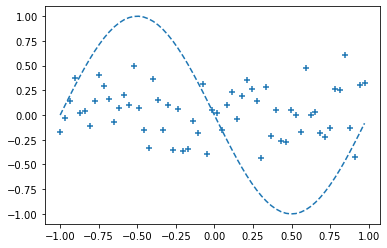

Epoch:0/2001 Error:0.2693853484890541


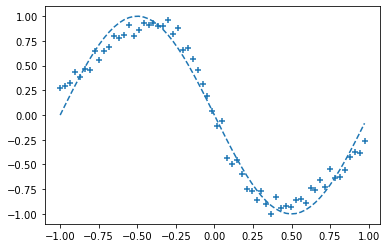

Epoch:200/2001 Error:0.007040515944559455


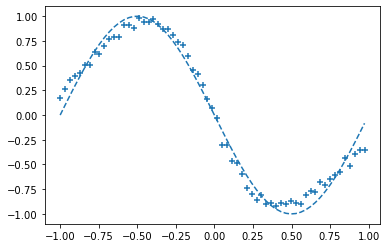

Epoch:400/2001 Error:0.004666530572850822


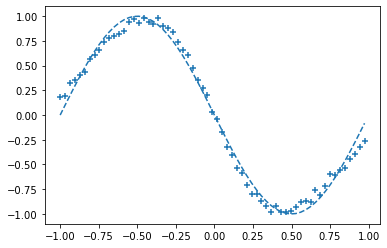

Epoch:600/2001 Error:0.0027874618274851266


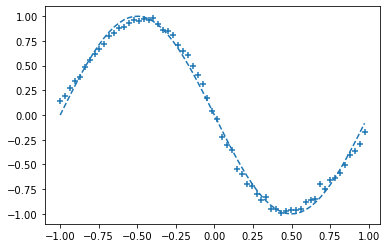

Epoch:800/2001 Error:0.001615355960238628


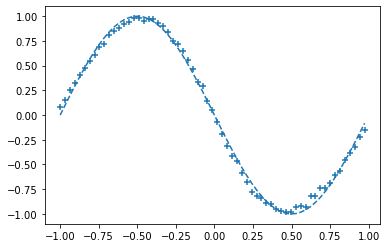

Epoch:1000/2001 Error:0.0009509772149632675


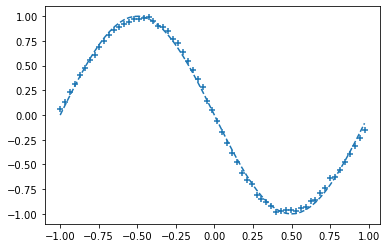

Epoch:1200/2001 Error:0.0005464907108023429


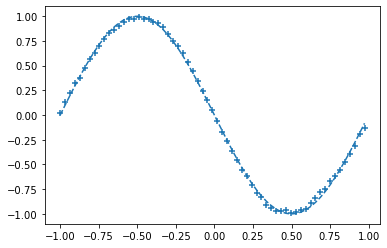

Epoch:1400/2001 Error:0.00024094718503261093


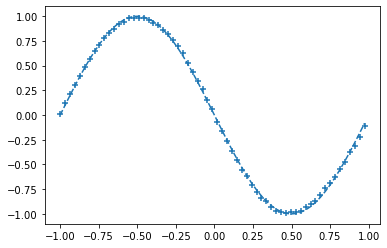

Epoch:1600/2001 Error:0.00013007525506505876


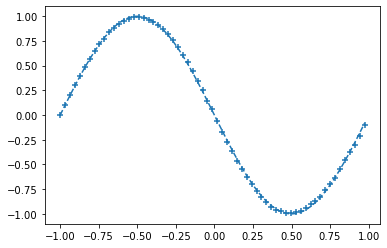

Epoch:1800/2001 Error:7.459042359811012e-05


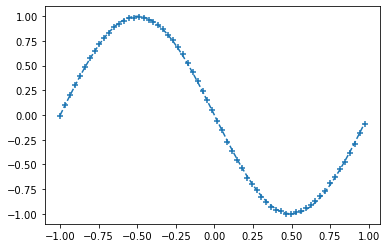

Epoch:2000/2001 Error:4.273579283383737e-05


In [28]:
# 초기값 설정
n_in = 1 # 입력층의 뉴런 수
n_mid = 5 # 은닉층의 뉴런 수
n_out = 1 # 출력층의 뉴런 수

wb_width = 0.01
eta = 0.1 # 학습률 learning rate
epoch = 2001
interval = 200

# 각 층의 초기화
middle_layer = MiddleLayer(n_in,n_mid)
output_layer = OutputLayer(n_mid,n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval==0:
            y = output_layer.y.reshape(-1)
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval==0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print('Epoch:' + str(i) +'/'+ str(epoch),\
                'Error:' + str(total_error/n_data))

- 3 또는 4개의 뉴런 이후에는 결과가 더 좋아지지 않고 계산량만 증가
- 이 문제에서는 은닉층에서 3또는 4개의 뉴런이 최적임
- 은닉층에서는 필요 이상의 뉴런 수는 과적합(overfitting)을 일으킴